## Cohes de Segunda Mano - Exploratory Data Analysis

Para este ejercicio vamos a usar el archivo _**coches_segunda_mano_limpio.csv**_, usaremos **pandas** para leer el archivo en Python y tenerlo como **pd.DataFrame**:

El **Dataframe** está compuesto por las siguiente columnas y tipos de datos:

|  |Columna                 |Descripción                                         |dtype     |
|--|------------------------|----------------------------------------------------|----------|
|0 |**tipo_combustible**    |Tipo de combustible.                                |**string**|
|1 |**kilometros**          |Kilometraje del coche.                              |**float** |
|2 |**tipo_carroceria**     |Tipo de carroceria del coche.                       |**string**|
|3 |**tipo_cambio**         |Tipo de cambio del coche.                           |**string**|
|4 |**potencia_cv**         |Potencia del coche en caballos de vapor.            |**float** |
|5 |**garantia**            |Duración de la garantía del coche en meses.         |**float** |
|6 |**distintivo_ambiental**|Etiqueta de Distintivo Ambiental.                   |**string**|
|7 |**precio**              |Precio del coche.                                   |**float** |
|8 |**peso_masa_kg**        |Peso del coche en kilogramos.                       |**float** |
|9 |**puertas**             |Número de puertas.                                  |**float** |
|10|**plazas**              |Número de plazas/asientos del coche.                |**float** |
|11|**cilindros**           |Número de cilindros del coche.                      |**float** |
|12|**co2**                 |Emisiones de CO2 en g/km.                           |**float** |
|13|**deposito**            |Tamaño del deposito de gasolina del coche el litros.|**float** |
|14|**month**               |Mes de la matriculación del coche.                  |**int**   |
|15|**year**                |Año de la matriculación del coche.                  |**int**   |

Lee el archivo con **pandas**, usaremos **df** como nombre para la variable del **DataFrame**.

#### 01. Columna: _precio_
1. Genera un **histograma** de la columna **precio**.
2. Transforma la columna de **precio** con la función **np.log()** y genera una nueva columna con estos datos, llama a esta nueva columna **log_precio**.
3. Repite el **histograma** con la columna **log_precio**.
---
#### 02. Columna: _kilometros_
1. Calcula la **desviación estandar** para esta columna y guardalo en una variable llamada **std**.
2. Genera un **histograma** de la columna **kilometros** y muestra usando linea verticales de color **rojo**: **1\*std**, **2\*std** y **3\*std**.
---
#### 03. Filtrado de Datos:
1. Calcula la **desviación estandar** para las columnas de **precio** y **kilometros** y guardalos en variables llamadas **std_precio** y **std_km** respectivamente.
2. Filtra los datos del DataFrame donde los valores de la columna **precio** sean menores o igual a **3\*std_precio** y los valores de la columna **kilometros** sean menores o igual a **4\*std**. Sobrescribe el DataFrame original.
3. Encuentra las 3 categorías de la columna **tipo_combustible** que menos se repitan, elimina esas categorías del **DataFrame**.
4. Filtra las columnas de **deposito** y **peso_masa_kg** donde los elementos sean mayores a 0.
---
#### 04. Columnas: _distintivo_ambiental_ y _precio_
1. Muestra la relación entre las columnas **distintivo_ambiental** y **precio** con un boxplot.
2. Muestra la relación entre las columnas **distintivo_ambiental** y **log_precio** con un boxplot.
3. ¿Se mantiene la misma relación?
---
#### 05. Columnas: _tipo_combustible_, _tipo_cambio_ y _precio_:
1. Muestra en un gráfico de barras la distribución de la columna **tipo_combustible** segmentado por **tipo_cambio**.
2. Muestra la relación de estas 3 columnas usando un boxplot.
---
#### 06. Columnas: _peso_masa_kg_, _co2_ y _distintivo_ambiental_
1. Muestra la relación de estas 3 columnas con un **scatterplot** usando **seaborn**.
2. Repite esta gráfica usando **plotly**.
3. ¿Se puede apreciar algun tipo de relación?
---
#### 07. Correlación:
1. Genera un mapa de calor con la correlación de los datos usando únicamente las columnas numéricas del **DataFrame**.
2. Modifica el tamaño del plot para que se puedan apreciar los valores.

**RESOLUCIÓN:**

Empezaremos, como siempre, importando las librerías que nos harán falta:

In [104]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

#### 00. Lee el archivo con **pandas**, usaremos **df** como nombre para la variable del **DataFrame**.

In [164]:
df = pd.read_csv("coches_segunda_mano_limpio.csv")

df.head(3)

,tipo_combustible,kilometros,tipo_carroceria,tipo_cambio,potencia_cv,garantia,distintivo_ambiental,precio,peso_masa_kg,puertas,plazas,cilindros,co2,deposito,month,year
0,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33400.0,1425.0,3.0,4.0,4.0,139.000000,35.0,5,2023
1,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33900.0,1425.0,3.0,4.0,4.0,139.000000,35.0,6,2023
2,Gasolina,15.0,Berlina,Manual,165.0,36.0,C,27200.0,1425.0,3.0,4.0,4.0,129.957545,35.0,12,2023


#### 01. Columna: _precio_
1. Genera un **histograma** de la columna **precio**.
2. Transforma la columna de **precio** con la función **np.log()** y genera una nueva columna con estos datos, llama a esta nueva columna **log_precio**.
3. Repite el **histograma** con la columna **log_precio**.

Para empezar, crearemos un histograma con nuestra columna de precio original:

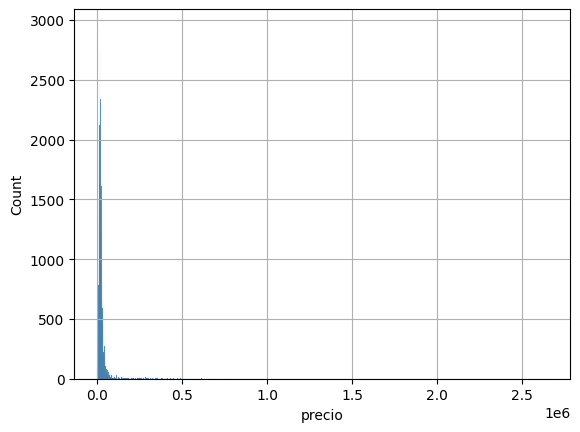

In [165]:
sns.histplot(df["precio"])
plt.grid()
plt.show()

Sin embargo, este gráfico es difícil de analizar debido a los outliers que posee, como, por ejemplo, el valor máximo, cuya cifra es de 2650000 euros. Estos valores tan extremos hacen que el resto de los valores se acumulen en una pequeña parte del gráfico y sean difíciles de leer.

In [166]:
df["precio"].max()

np.float64(2650000.0)

Ahora crearemos una nueva columna con los valores logarítmicos de la columna precio 

In [167]:
df["log_precio"] = df["precio"].map(lambda x : np.log(x))

In [168]:
df.head(3)

,tipo_combustible,kilometros,tipo_carroceria,tipo_cambio,potencia_cv,garantia,distintivo_ambiental,precio,peso_masa_kg,puertas,plazas,cilindros,co2,deposito,month,year,log_precio
0,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33400.0,1425.0,3.0,4.0,4.0,139.000000,35.0,5,2023,10.416311
1,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33900.0,1425.0,3.0,4.0,4.0,139.000000,35.0,6,2023,10.431170
2,Gasolina,15.0,Berlina,Manual,165.0,36.0,C,27200.0,1425.0,3.0,4.0,4.0,129.957545,35.0,12,2023,10.210972


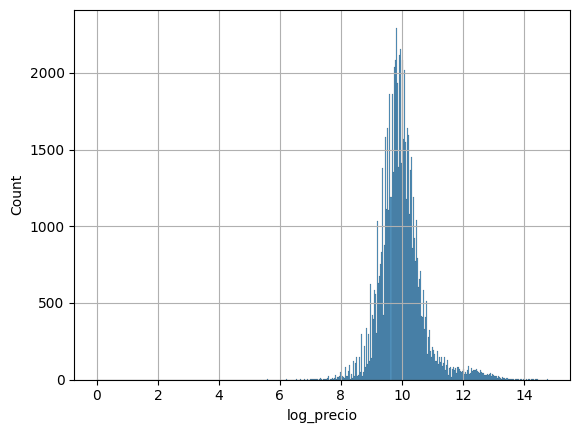

In [169]:
sns.histplot(df["log_precio"])
plt.grid()
plt.show()

Vemos que gracias a esta pequeña transformación de los valores de la columna de precio los datos se pueden observar más fácilmente ya que se acercan más a una distribución normal.

#### 02. Columna: _kilometros_
1. Calcula la **desviación estandar** para esta columna y guardalo en una variable llamada **std**.
2. Genera un **histograma** de la columna **kilometros** y muestra usando linea verticales de color **rojo**: **1\*std**, **2\*std** y **3\*std**.

Creamos la variable *std* con la desviación estandar de nuestra columna:

In [170]:
std = np.std(df["kilometros"])
std

np.float64(60599.67958449162)

Y generamos el histograma:

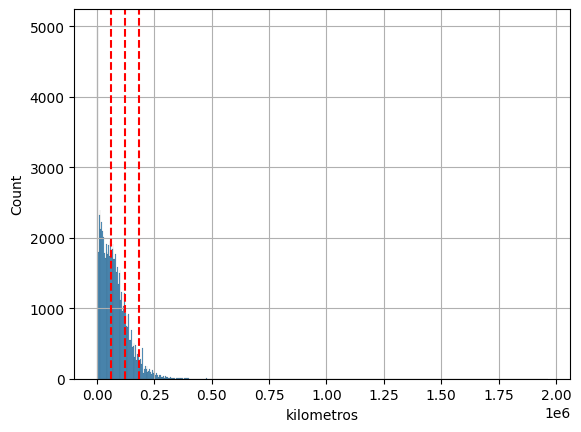

In [171]:
sns.histplot(df["kilometros"])

plt.axvline(1*std, color = "red", linestyle = "--")
plt.axvline(2*std, color = "red", linestyle = "--")
plt.axvline(3*std, color = "red", linestyle = "--")

plt.grid()
plt.show()

#### 03. Filtrado de Datos:
1. Calcula la **desviación estandar** para las columnas de **precio** y **kilometros** y guardalos en variables llamadas **std_precio** y **std_km** respectivamente.
2. Filtra los datos del DataFrame donde los valores de la columna **precio** sean menores o igual a **3\*std_precio** y los valores de la columna **kilometros** sean menores o igual a **4\*std**. Sobrescribe el DataFrame original.
3. Encuentra las 3 categorías de la columna **tipo_combustible** que menos se repitan, elimina esas categorías del **DataFrame**.
4. Filtra las columnas de **deposito** y **peso_masa_kg** donde los elementos sean mayores a 0.

Calculamos las desviaciones estandar de ambas columnas y las guardamos en sus respectivas variables:

In [172]:
std_precio = np.std(df["precio"])
std_km = np.std(df["kilometros"])

print(std_precio, std_km)

57223.11288553014 60599.67958449162


Sobreescribimos nuestro dataframe con los filtros que se nos pide:

In [173]:
df = df[(df["precio"] <= 3*std_precio) & (df["kilometros"] <= 4*std_km)]
df

,tipo_combustible,kilometros,tipo_carroceria,tipo_cambio,potencia_cv,garantia,distintivo_ambiental,precio,peso_masa_kg,puertas,plazas,cilindros,co2,deposito,month,year,log_precio
0,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33400.0,1425.0,3.0,4.0,4.0,139.000000,35.0,5,2023,10.416311
1,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33900.0,1425.0,3.0,4.0,4.0,139.000000,35.0,6,2023,10.431170
2,Gasolina,15.0,Berlina,Manual,165.0,36.0,C,27200.0,1425.0,3.0,4.0,4.0,129.957545,35.0,12,2023,10.210972
3,Gasolina,50.0,Berlina,Manual,180.0,12.0,C,38900.0,1545.0,3.0,4.0,4.0,129.957545,35.0,1,2024,10.568750
4,Gasolina,2500.0,Berlina,Automático,180.0,36.0,C,29850.0,1545.0,3.0,4.0,4.0,129.957545,35.0,5,2023,10.303940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71213,Híbrido Enchufable,99000.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,51490.0,2980.0,5.0,7.0,4.0,48.000000,70.0,11,2020,10.849143
71214,Híbrido Enchufable,26761.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,68900.0,2980.0,5.0,7.0,4.0,48.000000,70.0,5,2022,11.140411
71215,Híbrido Enchufable,66070.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,67900.0,2980.0,5.0,7.0,4.0,48.000000,70.0,2,2021,11.125791
71216,Híbrido Enchufable,31800.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,61500.0,2980.0,5.0,7.0,4.0,48.000000,70.0,12,2020,11.026792


Ahora queremos econtrar las 3 categorías de tipo_combustible que menos se repiten:

In [174]:
combustibles_inusuales = df["tipo_combustible"].value_counts(ascending=True).head(3).index.values
combustibles_inusuales

array(['Corriente eléctrica', 'Mixto Gasolina/Etanol',
       'Diesel y corriente eléctrica'], dtype=object)

Y sobreescribieremos nuestro dataframe, en este caso eliminaremos todas las filas que posean alguno de los 3 tipos de combustible que conseguimos arriba. Para variar un poco, este ejercicio este apartado lo he realizado con un mapeo, pero también se podría realizar con el método de filtros *.isin()*:

In [175]:
df["tipo_combustible"] = df["tipo_combustible"].map(lambda x : np.nan if x in combustibles_inusuales else x)

In [176]:
df = df.dropna()

len(df)

68527

Ahora filtramos las columnas de depósito y peso_masa_kg, pero sin modificar el dataframe ya que no nos lo pide:

In [177]:
df[df["deposito"] > 0] 


,tipo_combustible,kilometros,tipo_carroceria,tipo_cambio,potencia_cv,garantia,distintivo_ambiental,precio,peso_masa_kg,puertas,plazas,cilindros,co2,deposito,month,year,log_precio
0,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33400.0,1425.0,3.0,4.0,4.0,139.000000,35.0,5,2023,10.416311
1,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33900.0,1425.0,3.0,4.0,4.0,139.000000,35.0,6,2023,10.431170
2,Gasolina,15.0,Berlina,Manual,165.0,36.0,C,27200.0,1425.0,3.0,4.0,4.0,129.957545,35.0,12,2023,10.210972
3,Gasolina,50.0,Berlina,Manual,180.0,12.0,C,38900.0,1545.0,3.0,4.0,4.0,129.957545,35.0,1,2024,10.568750
4,Gasolina,2500.0,Berlina,Automático,180.0,36.0,C,29850.0,1545.0,3.0,4.0,4.0,129.957545,35.0,5,2023,10.303940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71213,Híbrido Enchufable,99000.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,51490.0,2980.0,5.0,7.0,4.0,48.000000,70.0,11,2020,10.849143
71214,Híbrido Enchufable,26761.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,68900.0,2980.0,5.0,7.0,4.0,48.000000,70.0,5,2022,11.140411
71215,Híbrido Enchufable,66070.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,67900.0,2980.0,5.0,7.0,4.0,48.000000,70.0,2,2021,11.125791
71216,Híbrido Enchufable,31800.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,61500.0,2980.0,5.0,7.0,4.0,48.000000,70.0,12,2020,11.026792


In [178]:
df[df["peso_masa_kg"] > 0]

,tipo_combustible,kilometros,tipo_carroceria,tipo_cambio,potencia_cv,garantia,distintivo_ambiental,precio,peso_masa_kg,puertas,plazas,cilindros,co2,deposito,month,year,log_precio
0,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33400.0,1425.0,3.0,4.0,4.0,139.000000,35.0,5,2023,10.416311
1,Gasolina,10.0,Berlina,Manual,140.0,36.0,C,33900.0,1425.0,3.0,4.0,4.0,139.000000,35.0,6,2023,10.431170
2,Gasolina,15.0,Berlina,Manual,165.0,36.0,C,27200.0,1425.0,3.0,4.0,4.0,129.957545,35.0,12,2023,10.210972
3,Gasolina,50.0,Berlina,Manual,180.0,12.0,C,38900.0,1545.0,3.0,4.0,4.0,129.957545,35.0,1,2024,10.568750
4,Gasolina,2500.0,Berlina,Automático,180.0,36.0,C,29850.0,1545.0,3.0,4.0,4.0,129.957545,35.0,5,2023,10.303940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71213,Híbrido Enchufable,99000.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,51490.0,2980.0,5.0,7.0,4.0,48.000000,70.0,11,2020,10.849143
71214,Híbrido Enchufable,26761.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,68900.0,2980.0,5.0,7.0,4.0,48.000000,70.0,5,2022,11.140411
71215,Híbrido Enchufable,66070.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,67900.0,2980.0,5.0,7.0,4.0,48.000000,70.0,2,2021,11.125791
71216,Híbrido Enchufable,31800.0,Todo Terreno,Automático,390.0,12.0,0 EMISIONES,61500.0,2980.0,5.0,7.0,4.0,48.000000,70.0,12,2020,11.026792


#### 04. Columnas: _distintivo_ambiental_ y _precio_
1. Muestra la relación entre las columnas **distintivo_ambiental** y **precio** con un boxplot.
2. Muestra la relación entre las columnas **distintivo_ambiental** y **log_precio** con un boxplot.
3. ¿Se mantiene la misma relación?

**distintivo_ambiental** VS **precio**:

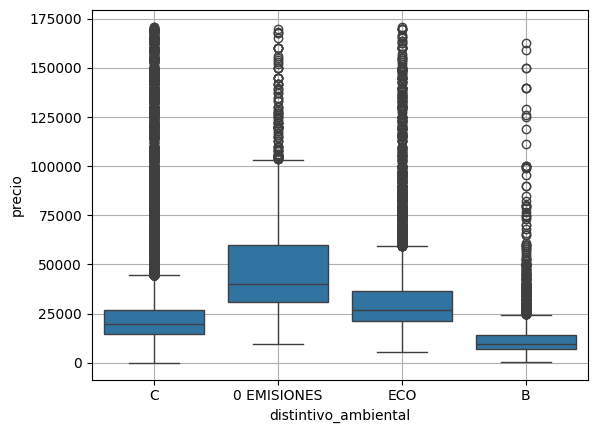

In [179]:
sns.boxplot(x = df["distintivo_ambiental"],
            y = df["precio"]
            )

plt.grid()
plt.show()

**distintivo_ambiental** VS **log_precio**:

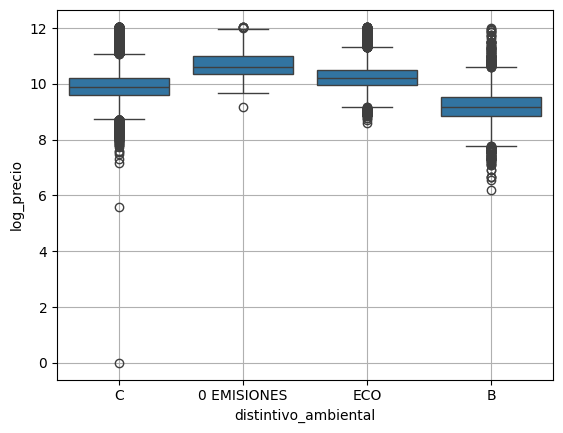

In [180]:
sns.boxplot(x = df["distintivo_ambiental"],
            y = df["log_precio"]
            )

plt.grid()
plt.show()

La relación entre distintivo ambiental y precio o su logaritmo parece la misma, sin embargo cambia la distribución de los datos de precio. Vemos que en el segundo gráfico los outliers están distribuidos de forma más equiparable, normalizando los datos.

#### 05. Columnas: _tipo_combustible_, _tipo_cambio_ y _precio_:
1. Muestra en un gráfico de barras la distribución de la columna **tipo_combustible** segmentado por **tipo_cambio**.
2. Muestra la relación de estas 3 columnas usando un boxplot.

Gráfico de barras: **_tipo_combustible_** Y **_tipo_cambio_** VS **_precio_**

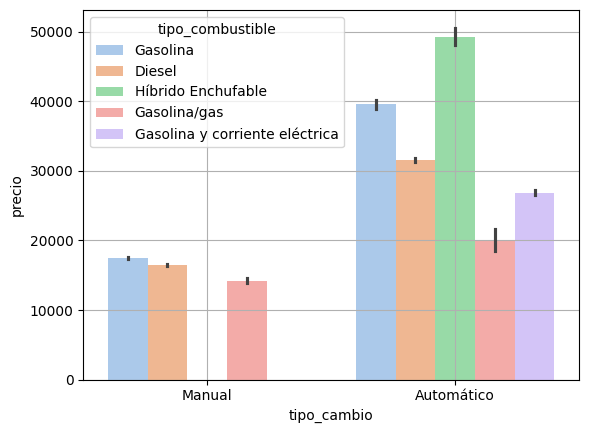

In [185]:
sns.barplot(x = df["tipo_cambio"], 
            y = df["precio"], 
            hue = df["tipo_combustible"], 
            palette = "pastel"
            )
plt.grid()
plt.show()

Gráfico de cajas: **_tipo_combustible_** Y **_tipo_cambio_** VS **_precio_**

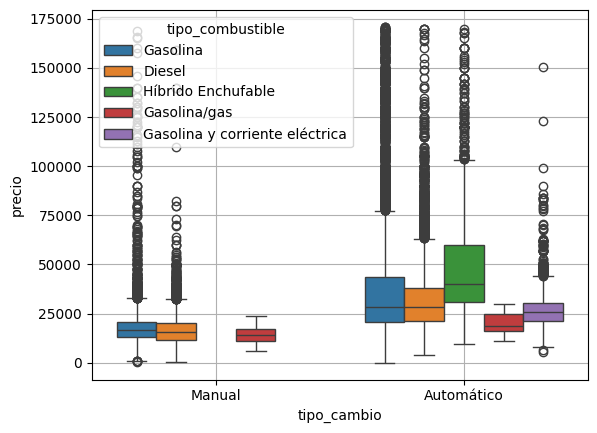

In [186]:
sns.boxplot(x = df["tipo_cambio"], 
            y = df["precio"], 
            hue = df["tipo_combustible"]
            )

plt.grid()
plt.show()

#### 06. Columnas: _peso_masa_kg_, _co2_ y _distintivo_ambiental_
1. Muestra la relación de estas 3 columnas con un **scatterplot** usando **seaborn**.
2. Repite esta gráfica usando **plotly**.
3. ¿Se puede apreciar algun tipo de relación?

Gráfico de dispersión con seaborn: **_peso_masa_kg_** VS **_co2_** VS **_distintivo_ambiental_**

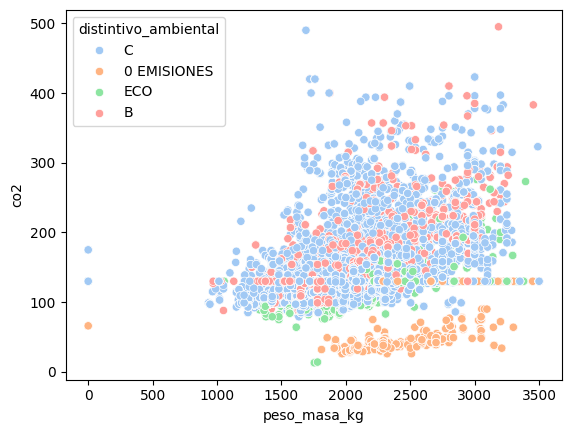

In [187]:
sns.scatterplot(x = df["peso_masa_kg"], y = df["co2"], hue = df["distintivo_ambiental"], palette = "pastel")
plt.show()

Gráfico de dispersión con plotly: **_peso_masa_kg_** VS **_co2_** VS **_distintivo_ambiental_**

In [188]:
px.scatter(data_frame  = df,
           x           = "peso_masa_kg",
           y           = "co2",
           color       = "distintivo_ambiental"
           )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'distintivo_ambiental=C<br>peso_masa_kg=%{x}<br>co2=%{y}<extra></extra>',
              'legendgroup': 'C',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'C',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAABElkAAAAAAAESWQAAAAAAARJ' ... 'AAAAB8pUAAAAAAAHylQAAAAAAAfKVA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAABgYUAAAAAAAGBhQPy/+jSkPm' ... 'AAAAAAZ0AAAAAAAGBnQAAAAAAAYGdA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'distintivo_ambiental=0 EMISIONES<br>peso_masa_kg=%{x}<br>co2=%{y}<extra></extra>',
              'legendgroup': '0 EMISIONES',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '0 EMISIONES',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAADYnUAAAAAAANidQAAAAAAA2J' ... 'AAAABIp0AAAAAAAEinQAAAAAAA1KdA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('/L/6NKQ+YED8v/o0pD5gQPy/+jSkPm' ... 'AAAAAASEAAAAAAAABIQAAAAAAAAEhA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'distintivo_ambiental=ECO<br>peso_masa_kg=%{x}<br>co2=%{y}<extra></extra>',
              'legendgroup': 'ECO',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'ECO',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAACuoEAAAAAAAK6gQAAAAAAArq' ... 'AAAAB8pUAAAAAAAHylQAAAAAAAMKZA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('/L/6NKQ+YED8v/o0pD5gQPy/+jSkPm' ... 'AAAADgYkAAAAAAAOBiQAAAAAAA4GJA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'distintivo_ambiental=B<br>peso_masa_kg=%{x}<br>co2=%{y}<extra></extra>',
              'legendgroup': 'B',
              'marker': {'color': '#ab63fa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'B',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAACQmkAAAAAAAKibQAAAAAAAiJ' ... 'AAADykQAAAAAAAPKRAAAAAAAA8pEA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('/L/6NKQ+YEAAAAAAACBjQPy/+jSkPm' ... 'AAAOBtQAAAAAAA4G1AAAAAAADgbUA='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'distintivo_ambiental'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'peso_masa_kg'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'co2'}}}
})

A simple vista se puede intuir que estas variables guardan algún tipo de relación, muy posiblemente lineal. Estos se puede apreciar sobretodo en los coches con distintivo ambiental 0 emisiones.

#### 07. Correlación:
1. Genera un mapa de calor con la correlación de los datos usando únicamente las columnas numéricas del **DataFrame**.
2. Modifica el tamaño del plot para que se puedan apreciar los valores.

Mapa de calor: 

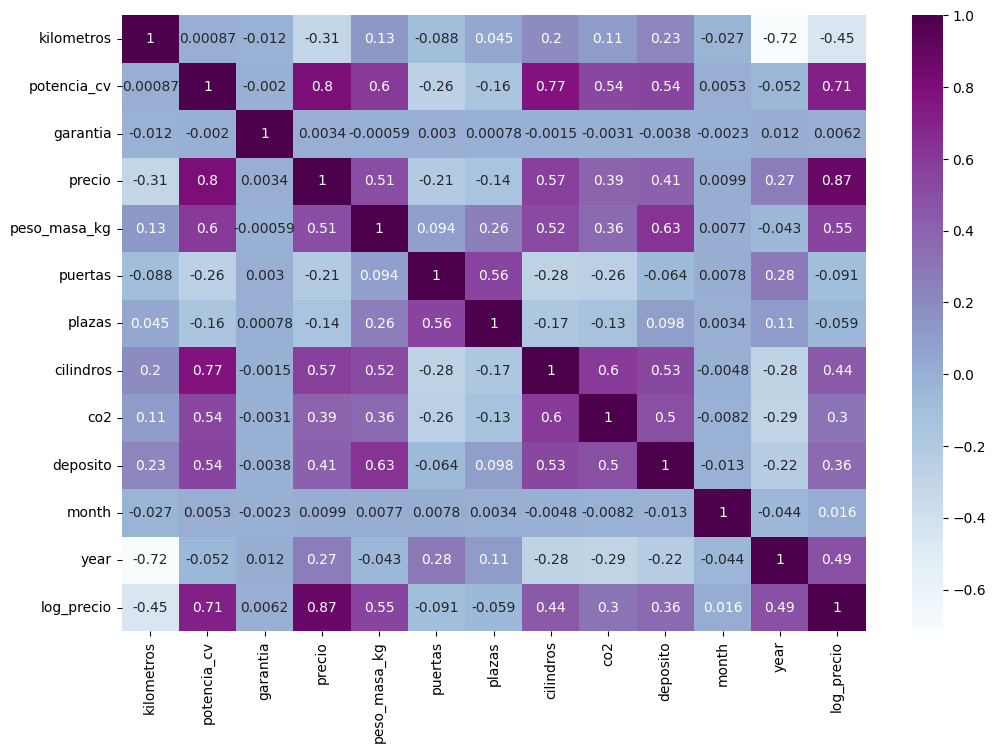

In [189]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df._get_numeric_data().corr(),
            annot = True,
            cmap = "BuPu"
            )
plt.show()

Con los heatmaps es muy fácil distinguir qué variables están más relacionadas entre ellas. Aquí, por ejemplo, podemos observar que el precio y la potencia están fuertemente correlacionados (con un valor de correlación de 0.8 sobre 1).

In [ ]:
##############################################################################################################################